<a href="https://colab.research.google.com/github/taylorvroman09/Taylor-Public/blob/main/Notebook6_Vroman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Taylor Vroman

# Notebook \# 6
Name: Taylor Vroman
Date: 29 November 2021


## Problem Description:



### Hints/ Tips Tricks
- Don't forget to enable GPUs under 'Edit', 'Notebook Settings', 'Accerlate Hardware', 'GPU'.
- Make sure you unzip the data and put it in your Drive.


This data will run epochs to determine the most accurate approach necessary to determine if a chest xray is normal or of a patient with pneumonia.  

In [3]:
import keras
import tensorflow 
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys

## Connect to Drive
from google.colab import drive
import pandas
drive.mount('/content/drive')

## Image dimensions
img_width = 200
img_height = 200

## Directories for testing and training data
train_data_dir = '/content/drive/MyDrive/MachineLearning/chest_xray/train' 
test_data_dir = '/content/drive/MyDrive/MachineLearning/chest_xray/test'

## To feed the training images to the neural network in batches of 32 images at a time
batch_size = 32

## Rescale pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

## Look for training and testing data and figure out the class of each example based on subfolder
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Mounted at /content/drive
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Build a baseline CNN that has this structure:
- Conv layer 1
- Pool layer 1
- Conv layer 2
- Pool layer 2
- Flatten
- Fully Connected (Dense)

In [4]:
# Build your CNN here

#We'll try a second model, this time with pooling layers after each convolutional layer
model2 = Sequential()
model2.add(Conv2D(32, (2, 2), activation = 'relu', input_shape=(img_width, img_height, 3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (2, 2),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (2, 2),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(64,activation = 'relu'))
model2.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [5]:
training_results2 = model2.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=1, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


163/163 [==============================] - 986s 6s/step - loss: 0.5589 - accuracy: 0.7433 - val_loss: 0.5975 - val_accuracy: 0.6266


Just 1 epoch took 37 minutes...so that's why I just ran 1!

Build a tuned CNN--simply a CNN that has some changes from the first one. You may change whichever parameters you like (consider the kernel size, the number of layers, the types of layer, the number of feature maps in each layer, adding dropout layers, etc). Just make some sort of change that you think might be significant, train you new model, and compare its performance to the original. In a text-cell, describe what you changed.

You should train each model for enough epochs that your performance on the test set stops improving (i.e., show where you reach overfitting) OR for at least 30 minutes of training time. If you would like to further experiment with additional changes, that is fine, but because these things sometimes take a long time to train, I'm setting a low bar for just showing me two variations.


Include graphs of how well your testing data performed vs. the training data.

In [6]:
# Tuned CNN

model3 = Sequential()
model3.add(Conv2D(32, (4, 4), activation = 'relu', input_shape=(img_width, img_height, 3)))
model3.add(MaxPooling2D(pool_size=(3, 3)))

model3.add(Conv2D(32, (4, 4),activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(3, 3)))

model3.add(Conv2D(64, (4, 4),activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(3, 3)))

model3.add(Flatten())
model3.add(Dense(64,activation = 'relu'))
model3.add(Dense(1,activation='sigmoid'))

# need to compile the model before you can use it
opt = SGD(lr=0.001, momentum=0.9)
model3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [7]:
training_results3 = model3.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=1, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


163/163 [==============================] - 21s 122ms/step - loss: 0.5845 - accuracy: 0.7291 - val_loss: 0.7256 - val_accuracy: 0.6250


I realize the code below does not result in an effective graph. This is because there is only 1 epoch value (because it took 37 mins!). This code would be used at showing the accuracies across epochs, and the range could be changed in the plt.xlim line.

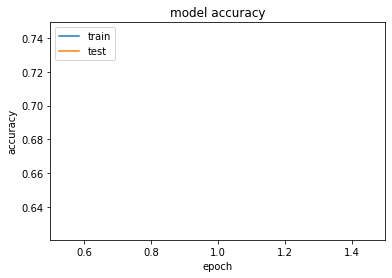

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results2.history['accuracy'])
plt.plot(training_results2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0.5,1.5])
plt.show()

The same goes for the following plot - except for tuned CNN values. 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results3.history['accuracy'])
plt.plot(training_results3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0.5,1.5])
plt.show()

Conclusions: Answer the following questions in a markup cell at the bottom of your notebook.

What configuration of your CNN proved to be more accurate? Why do you think this is the case?
How accurate can you make your CNN predictor? I will award a bonus point to the student who can achieve the most accurate model.

The tuned data has an accuracy of 0.7291 (changed to 4 conv layers and 3 pooled layers) and the untuned data has an accuracy of 0.7433 (3 conv layers and 2 pooled). This suggests that the tuned data has been overfitted. Could make this more accurate by alterting the layers even more. 